In [1]:
## Autoencoders are a class of Unsupervised Networks that consist of two major networks: Encoders and Decoders.
## The Encoder generally uses a series of Dense and/or Convolutional layers to encode an image into a fixed length 
## vector that represents the image a compact form, while the Decoder uses Dense and/or Convolutional layers to 
## convert the latent representation vector back into that same image or another modified image.

In [2]:
#!pip install tensorflow-gpu==2.0.0b1
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
import numpy as np

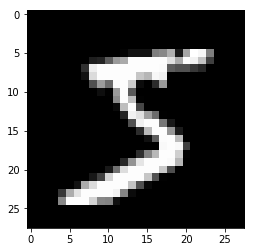

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [4]:
## Latent size is the size of the latent space: the vector holding the information after compression.
## This value is a crucial hyperparameter. If this value is too small, there won’t be enough data for 
## reconstruction and if the value is too large, overfitting can occur.

LATENT_SIZE = 32

encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),                                 ## introduces non-linearity into the mix
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="sigmoid"),
])

In [5]:
## The decoder is essentially the same as the encoder but in reverse. The final activation layer is sigmoid.
## The sigmoid activation function output values in the range [0, 1] which fits perfectly with scaled image data.

decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [6]:
## For the optimizer, choose Nadam, which is Nesterov Accelerated Gradient applied to Adaptive Moment Estimation.
## It is a modified Adam optimizer.

img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

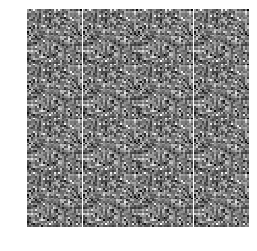

----------- EPOCH 0 -----------
Train on 60000 samples
60000/60000 [==============================] - 20s 328us/sample - loss: 0.2431


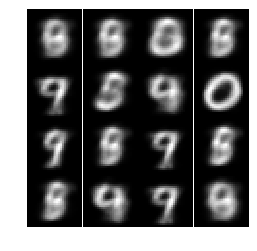

----------- EPOCH 1 -----------
Train on 60000 samples
60000/60000 [==============================] - 16s 272us/sample - loss: 0.2146


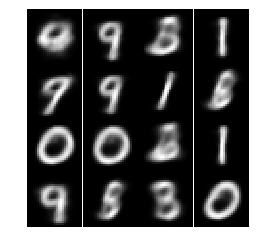

----------- EPOCH 2 -----------
Train on 60000 samples
60000/60000 [==============================] - 21s 342us/sample - loss: 0.2044


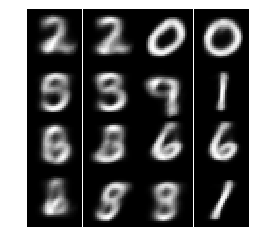

----------- EPOCH 3 -----------
Train on 60000 samples
60000/60000 [==============================] - 17s 280us/sample - loss: 0.2001


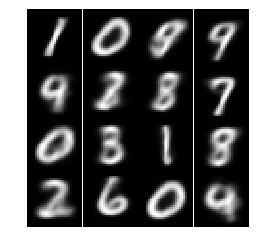

----------- EPOCH 4 -----------
Train on 60000 samples
60000/60000 [==============================] - 17s 276us/sample - loss: 0.1976


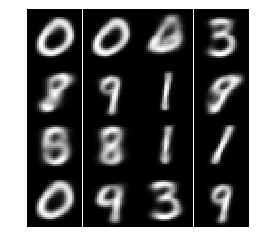

----------- EPOCH 5 -----------
Train on 60000 samples
60000/60000 [==============================] - 21s 342us/sample - loss: 0.1958


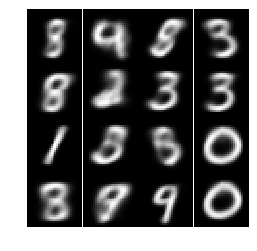

----------- EPOCH 6 -----------
Train on 60000 samples
31488/60000 [==============>...............] - ETA: 8s - loss: 0.1946

KeyboardInterrupt: 

In [7]:
EPOCHS = 60
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = 64)

In [9]:
## Practical applications of an Autoencoder network include:

##    Denoising
##    Image Reconstruction
##    Image Generation
##    Data Compression & Decompression